# Practice for 5509 Supervise Machine Learning

# Earthquake Severity Classification Prediction 

# 1. Problem Statement

Earthquakes are one of the largest natural disasters and sometimes can cause tsunamis to happen. It will be very helpful if we can predict when an earthquake will happen and prepare for them. However, as of now, we do not have technology to predict when an earthquake will happen. Even though we can't predict when an earthquake will happen, in this project we will build models to predict the level of the earthquake using predictors that we have in our data, and hope in the future when we have better technology to detect the earthquake, then we can use this model to predict the severity of an earthquake and better prepare.

For the purposes of this project, we will be using the Earthquake dataset from kaggle provided by the user Chirag Chauhan (link - https://www.kaggle.com/datasets/warcoder/earthquake-dataset ). This is going to be a classification problem and we will be building different classification models and try to see which model might be the best fit for this use case.

# 2.  EDA

### 2.1 DATA PREPROCESSING

#### 2.1.1  Notebook initialization, load necessary packages

In [383]:
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import CalibratedClassifierCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay


import matplotlib.pyplot as plt

#### 2.1.2  DATA PREPROCESSING  

Datasets contain records of 782 earthquakes from 1/1/2001 to 1/1/2023. The meaning of 18 columns are as follows:  

- **title**: title name given to the earthquake
- **magnitude**: The magnitude of the earthquake
- **date_time**: date and time
- **cdi**: The maximum reported intensity for the event range
- **mmi**: The maximum estimated instrumental intensity for the event
- **alert**: The alert level - “green”, “yellow”, “orange”, and “red”
- **tsunami**: "1" for events in oceanic regions and "0" otherwise
- **sig**: A number describing how significant the event is. Larger numbers indicate a more significant event. This value is determined on a number of factors, including: magnitude, maximum MMI, felt reports, and estimated impact
- **net**: The ID of a data contributor. Identifies the network considered to be the preferred source of information for this event.
- **nst**: The total number of seismic stations used to determine earthquake location.
- **dmin**: Horizontal distance from the epicenter to the nearest station
- **gap**: The largest azimuthal gap between azimuthally adjacent stations (in degrees). In general, the smaller this number, the more reliable is the calculated horizontal position of the earthquake. Earthquake locations in which the azimuthal gap exceeds 180 degrees typically have large location and depth uncertainties
- **magType**: The method or algorithm used to calculate the preferred magnitude for the event
- **depth**: The depth where the earthquake begins to rupture
- **latitude / longitude**: coordinate system by means of which the position or location of any place on Earth's surface can be determined and described
- **location**: location within the country
- **continent**: continent of the earthquake hit country
- **country**: affected country




In [187]:
#Load Data
df = pd.read_csv('./earthquake_data.csv')
print('Data shape:', df.shape)
df.head()

Data shape: (782, 19)


,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

### 2.1.2.1. Change datatype 'date_time' to 'month' to group together when earthquakes happen by month
### 2.1.2.2. We will drop 'title', 'location', 'continent', 'country'. The 'latitude' and 'longtitude' will be able to track the location, continent, and country, so they are not correlated to each other.
### 2.1.2.3. We will use 'alert' as a target, so we will drop the null in the 'alert' column.  
### 2.1.2.4. Check the data balancing and do data balancing using the oversampling mathod.
### 2.1.2.5. We will do label encoding data type 'object', so it work with our models.

In [189]:
#2.1.2.1.
df["date_time"] = pd.DatetimeIndex(pd.to_datetime(df["date_time"])).month


In [190]:
#2.1.2.2.
drop_cols = ['title', 'location', 'continent', 'country']
df = df.drop(columns = drop_cols)
#2.1.2.3.
df = df[df['alert'].notna()]
df.isnull().sum()

magnitude    0
date_time    0
cdi          0
mmi          0
alert        0
tsunami      0
sig          0
net          0
nst          0
dmin         0
gap          0
magType      0
depth        0
latitude     0
longitude    0
dtype: int64

<Axes: title={'center': 'Count (alert)'}>

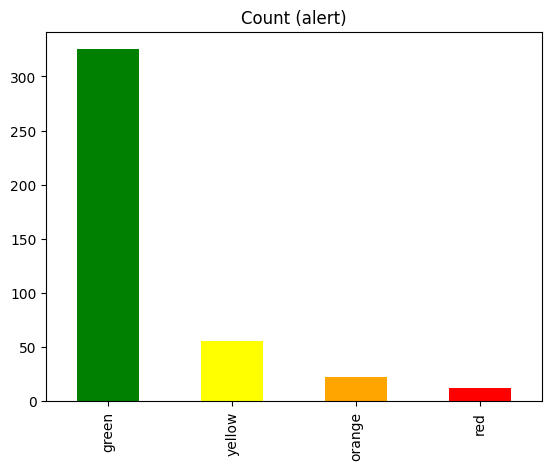

In [191]:
##2.1.2.4.
df['alert'].value_counts().plot(kind='bar', title='Count (alert)', color=['green', 'yellow', 'orange', 'red'])


The data is unbalanced as you can see in the graph above. The data has the earthquake severity level of 'green' a lot more than 'yellow', 'orange', and 'red'. This will affect our models, so we will have to balnce the data first before we build the models. In this project we will use oversampling to balance the data.

In [192]:
x = df.drop('alert', axis = 1)
y = df['alert']

ros = RandomOverSampler(random_state=0)
xr, yr = ros.fit_resample(x,y)

<Axes: title={'center': 'Count (alert)'}>

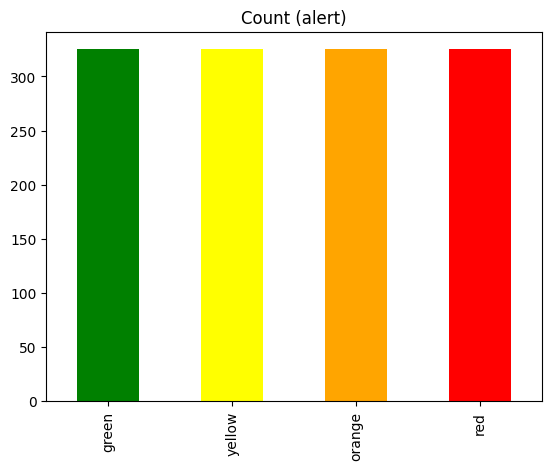

In [193]:
#2.1.2.4.
yr.value_counts().plot(kind='bar', title='Count (alert)', color=['green', 'yellow', 'orange', 'red'])


In [194]:
df2 = xr
df2['alert'] = yr

In [195]:
#2.1.2.5. 
alert_LaEn = LabelEncoder()
magtype_LaEn = LabelEncoder()
net_LaEn = LabelEncoder()
df2["alert"] = alert_LaEn.fit_transform(df2["alert"])
df2["magType"] = magtype_LaEn.fit_transform(df2["magType"])
df2["net"] = net_LaEn.fit_transform(df2["net"])


In [196]:
df2

,magnitude,date_time,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,alert
0,7.0,11,8,7,1,768,6,117,0.509,17.0,4,14.000,-9.7963,159.5960,0
1,6.9,11,4,4,0,735,6,99,2.229,34.0,4,25.000,-4.9559,100.7380,0
2,7.0,12,3,3,1,755,6,147,3.125,18.0,4,579.000,-20.0508,-178.3460,0
3,7.3,11,5,5,1,833,6,149,1.865,21.0,4,37.000,-19.2918,-172.1290,0
4,6.6,9,0,2,1,670,6,131,4.998,27.0,4,624.464,-25.5948,178.2780,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,7.5,11,8,8,1,1094,6,0,4.951,40.0,4,126.000,-4.4898,-76.8461,3
1296,7.9,12,9,7,1,972,6,0,1.389,13.0,4,94.540,-4.5049,153.5220,3
1297,6.7,1,6,6,1,909,6,0,0.289,43.0,4,66.000,14.6802,-92.4527,3
1298,7.9,12,9,7,1,972,6,0,1.389,13.0,4,94.540,-4.5049,153.5220,3


In [12]:
column10 = df2.columns[1:15].tolist()

# sns.pairplot(df2[column10], kind = "kde")
sns.pairplot(df2[column10],diag_kind = 'kde')
plt.show()
#,diag_kind = 'kde'

<Axes: >

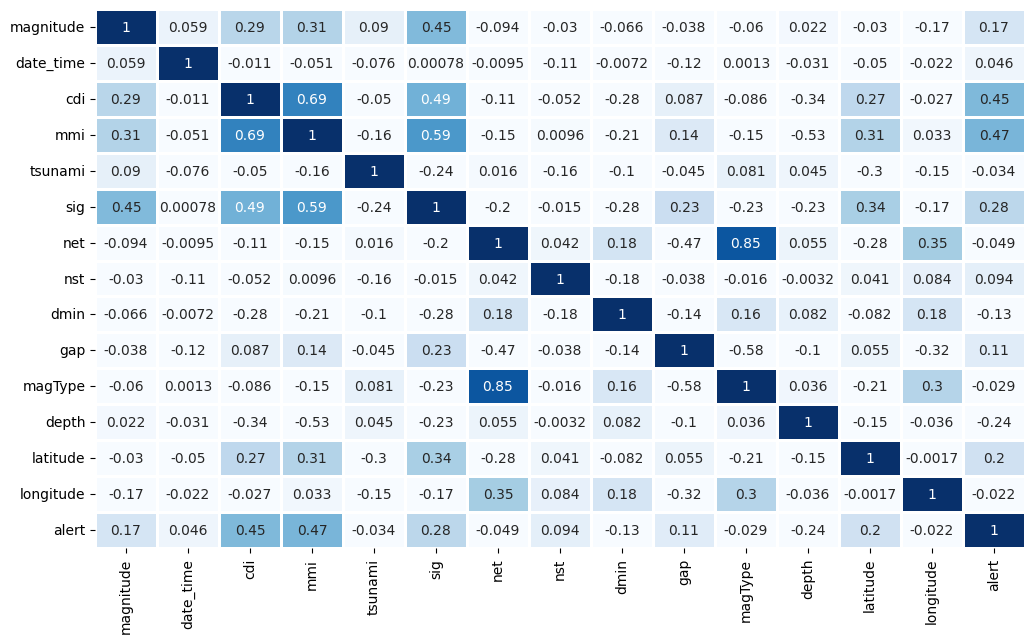

In [141]:
plt.figure(figsize = (12,7))
sns.heatmap(df2.corr(), cbar=0, linewidths=1,vmax=1, vmin=0, annot =True, cmap='Blues')


The correlation values are mostly small except for 'net' and 'magType' that seems to have high correclatiion as 0.85, however, 'net' is the ID of a data contributor and 'magType' is the method or algorithm used to calculate the preferred magnitude for the event which are not relate to each other. Some how when we label encoding it was a coincidence that 'net' and 'magType' got correlation value. In this project we will use 4 models Gaussian Naive Bayes, Decision Trees, Random Forest, and KNN that are not sensitive with correlation. 

Now we have clean data (no null, and drop all non nessesary predictor columns) and also the data balanced.

# 3. MODELING AND EVALUATION

**In this work we will practice 4 kinds of algorithms**
**and see which algorithm has higher AUC**
* Gaussian Naive Bayes
* Decision Trees
* Random Forest
* KNN

### 3.1  Spliting the data into training and test set in the ratio of 80:20**

In [386]:
x = df2.drop('alert', axis = 1)
y = df2['alert']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)



### 3.2.1 Gaussian Naive Bayes

In [356]:
NB = GaussianNB()
NB.fit(x_train, y_train)
NB_score = NB.score(x_train, y_train)
print("NB Train Score : ",'{0:.2%}'.format(NB_score))
NB_pre = NB.predict(x_test)

NB Train Score :  74.84%


In [357]:
print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,NB_pre)))
print("Recall : ",'{0:.2%}'.format(recall_score(y_test,NB_pre, average = 'macro')))
print("f1_score : ",'{0:.2%}'.format(f1_score(y_test,NB_pre, average = 'macro')))


Accuracy :  74.62%
Recall :  74.61%
f1_score :  74.36%


In [359]:
NB_Matrix = confusion_matrix(y_test, NB_pre)
print(NB_Matrix)

[[75  5  0 21]
 [ 0 93  0 11]
 [ 0  8 81  0]
 [11 39  4 42]]


### 3.2.2 Decision Trees

In [361]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train) 
DT_score = DT.score(x_train, y_train)
print("DT Train Score : ",'{0:.2%}'.format(DT_score))
DT_pre = DT.predict(x_test)

DT Train Score :  100.00%


In [362]:
print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,DT_pre)))
print("Recall : ",'{0:.2%}'.format(recall_score(y_test,DT_pre, average = 'macro')))
print("f1_score : ",'{0:.2%}'.format(f1_score(y_test,DT_pre, average = 'macro')))


Accuracy :  95.13%
Recall :  95.26%
f1_score :  95.17%


In [363]:
DT_Matrix = confusion_matrix(y_test, DT_pre)
print(DT_Matrix)

[[ 85   0   0  16]
 [  0 104   0   0]
 [  0   0  89   0]
 [  3   0   0  93]]


### 3.2.3 Random Forest  
For this model we will start with tunning the learning rate and find our what is the best learnign rate to put to our model.

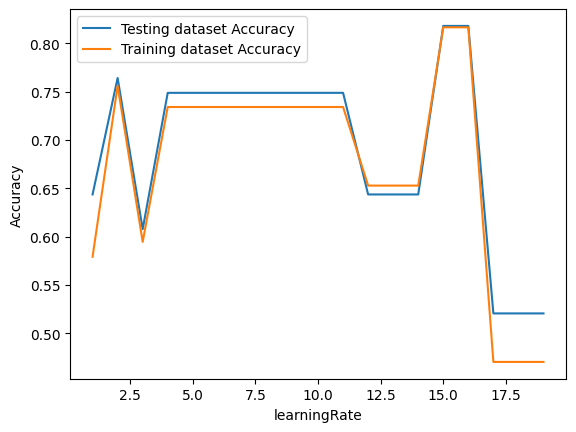

In [346]:
learningRate = np.arange(1, 20)
train_accuracy = np.empty(len(learningRate))
test_accuracy = np.empty(len(learningRate))
  
# Loop over K values
for i, k in enumerate(learningRate):
    RF = AdaBoostClassifier(n_estimators=100, learning_rate=k, random_state = 1234)
    RF.fit(x_train, y_train)
      
#     Compute training and test data accuracy
    train_accuracy[i] = RF.score(x_train, y_train)
    test_accuracy[i] = RF.score(x_test, y_test)
    
  

plt.plot(learningRate, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(learningRate, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('learningRate')
plt.ylabel('Accuracy')
plt.show()

### From the result about we found learnign rate between 15-16 is the best learing rate. in this model we will use learnign late as 16.

In [371]:
RF = AdaBoostClassifier(n_estimators=100, learning_rate=16, random_state = 1234)
RF.fit(x_train, y_train)
RF_score = RF.score(x_train, y_train)
print("RF Train Score : ",'{0:.2%}'.format(RF_score))
RF_pre = RF.predict(x_test)

RF Train Score :  81.65%


In [372]:
print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,RF_pre)))
print("Recall : ",'{0:.2%}'.format(recall_score(y_test,RF_pre, average = 'macro')))
print("f1_score : ",'{0:.2%}'.format(f1_score(y_test,RF_pre, average = 'macro')))


Accuracy :  81.79%
Recall :  81.77%
f1_score :  80.85%


In [373]:
RF_Matrix = confusion_matrix(y_test, RF_pre)
print(RF_Matrix)

[[ 81   0   0  20]
 [  0 104   0   0]
 [  0   0  89   0]
 [ 15  36   0  45]]


### 3.2.3 KNN  
For this model we will start with tunning n neighbors to see what is the best n neighbors for this model.

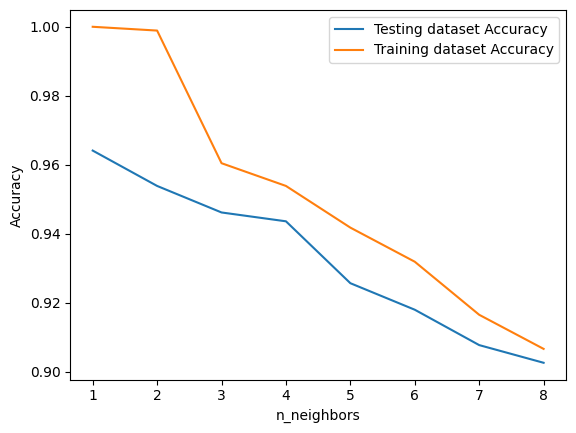

In [374]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
      
#     Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
    
  

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

### From the result about n neighbors = 1 is the best result, so in this model we will use n neighbots = 1

In [375]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
knn_score = knn.score(x_train, y_train)
print("NB Train Score : ",'{0:.2%}'.format(knn_score))   
knn_pre = knn.predict(x_test)

NB Train Score :  100.00%


In [376]:
print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,knn_pre)))
print("Recall : ",'{0:.2%}'.format(recall_score(y_test,knn_pre, average = 'macro')))
print("f1_score : ",'{0:.2%}'.format(f1_score(y_test,knn_pre, average = 'macro')))

Accuracy :  96.41%
Recall :  96.50%
f1_score :  96.44%


In [377]:
knn_Matrix = confusion_matrix(y_test, knn_pre)
print(knn_Matrix)

[[ 90   1   0  10]
 [  0 104   0   0]
 [  0   0  89   0]
 [  3   0   0  93]]


# 3. Conclusion

Let's start with take a look at accuracy, recall, and f1-score.

 |Sno. | Algortihm  | Accuracy    | Recall   | F1-score |
|---:|:-------------|:-----------|:------|:------|
| 1 | Gaussian Naive Bayes  | 74.62%     | 74.61%   | 74.36%    |
| 2 | Decision Tree  | 95.13%    | 95.26%  | 95.17%     |
| 3 | Random Forest | 81.79%   | 81.77%   | 80.85%     |
| 4 | KNN  | 96.41%   | 96.50%  | 96.44%     |

From the tabel above, we can see the Accuracy, Recall, and F1-score from each model are very close to each other. For these models we have balanced the data before we modeled them. This means Accuracy is a good measurement. Recall is the measurement to capture as many positive as you can. However, in this project we will use F1-score to measure all the models since it captured both positive and negative cases. After looking at the F1-score from the table above, we can see Decision Tree model and KNN model are giveing very close F1-score (95.17% for Decision Tree and 96.44% for KNN). Let's look at the matrix of these 4 models.

In [389]:
print("Gaussian Naive Bayes confusion matrix\n", NB_Matrix)
print()
print("Decision Tree confusion matrix\n", DT_Matrix)
print()
print("Random Forest confusion matrix\n", RF_Matrix)
print()
print("KNN confusion matrix\n", knn_Matrix)

Gaussian Naive Bayes confusion matrix
 [[75  5  0 21]
 [ 0 93  0 11]
 [ 0  8 81  0]
 [11 39  4 42]]

Decision Tree confusion matrix
 [[ 85   0   0  16]
 [  0 104   0   0]
 [  0   0  89   0]
 [  3   0   0  93]]

Random Forest confusion matrix
 [[ 81   0   0  20]
 [  0 104   0   0]
 [  0   0  89   0]
 [ 15  36   0  45]]

KNN confusion matrix
 [[ 90   1   0  10]
 [  0 104   0   0]
 [  0   0  89   0]
 [  3   0   0  93]]


From the confusion matrices above, we will focus more on missclasification between red and green (the model predicted green when it actually was red) because if the red event occurs and our model predicted green then we will risk people's lives, so we should focus on it. In this case Decision Tree and KNN do missclassification 3 times (the other 2 models have much more misclassification in this catagory). Since the top 2 models have the same missclassification between red and green, now we will look on missclassification between green and red (the model predicted red when it actually was green) for the Decision Tree and KNN models. This can cause significant inconvenience. KNN has 10 missclassification between green and red while Decision has 16.

In conclusion, base on our results, I would pick the KNN model becuase this model has a better F1-score and has less missclasification. However, still this model has missclasification between red and green 3 times. This is very serious problem, which suggests that this models could be improved in the future with feature engineering. 